In [62]:
import numpy as np
import matplotlib.pyplot as plt                                                          
import pandas as pd                  

defining sigmoid function , cost function and training 

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_predicted):
    m = len(y)
    cost= -(1 / m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
    return cost

def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    loss_history = []

    for _ in range(epochs):
        
        z = np.dot(X, weights) + bias
        y_predicted = sigmoid(z)

        
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)

        
        weights -= learning_rate * dw
        bias -= learning_rate * db

        
        loss = compute_loss(y, y_predicted)
        loss_history.append(loss)
    

    return weights, bias, loss_history



In [64]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_predicted]


In [65]:
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1  ))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    print(tp,fp,fn)
    precision = tp / (tp + fp )
    recall = tp / (tp + fn)
    print(precision,recall)
    return 2 * (precision * recall) / (precision + recall)

In [66]:
data = pd.read_csv(r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\binary_classification_train.csv")
data = data.drop(columns=['ID'])


X = data.drop(columns=['Class']).values
y = data['Class'].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Normalize features

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

weights, bias, loss_history = train_logistic_regression(X_train, y_train, learning_rate=5, epochs=10)
print(loss_history[-1])

y_pred = predict(X_train, weights, bias)
print(y_pred[:5])
print(y_train[:5])
accuracy = np.mean(y_pred == y_train)
metric = f1_score(y_train,y_pred)
print("f1_score for testing data set is ",metric)

print(f"Accuracy on training dataset: {accuracy * 100}%")

0.2518366539996527
[0, 1, 0, 0, 0]
[0 1 0 0 0]
0 0 0
nan nan
f1_score for testing data set is  nan
Accuracy on training dataset: 93.23681707703687%


C:\Users\91944\AppData\Local\Temp\ipykernel_17640\1317263964.py:6: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp )
C:\Users\91944\AppData\Local\Temp\ipykernel_17640\1317263964.py:7: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


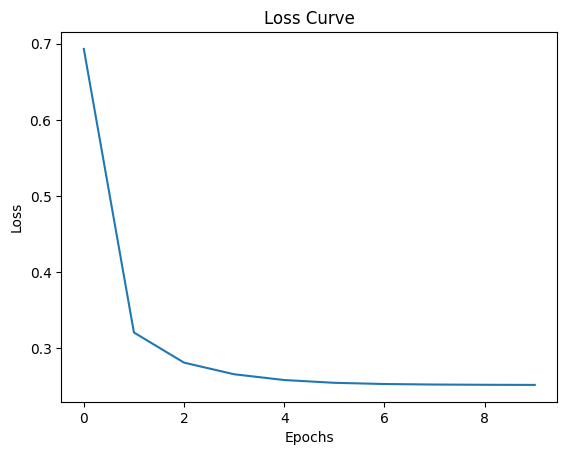

In [67]:
# Plot the loss curve
plt.plot(loss_history)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [68]:
test_data = pd.read_csv(r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\binary_classification_test.csv")


# Prepare features and labels for the new dataset
X_new = test_data.drop(columns=["ID"]).values
X_new = (X_new - np.mean(X, axis=0)) / np.std(X, axis=0)  # Use training normalization parameters

# Evaluate the model on the new dataset
y_new_pred = predict(X_new, weights, bias)


test_data['Predicted'] = y_new_pred
test_data.to_csv(r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\binary_classification_test_updated.csv", index=False)
print("Predictions saved in the original test data file.")



Predictions saved in the original test data file.
